## Pandas
- Pandas es una biblioteca de análisis y manipulación de datos de código abierto, rápida, poderosa, flexible y fácil de usar, construida sobre el lenguaje de programación Python.

In [1]:
# !pip3 install pandas
import pandas as pd

In [ ]:
d = pd.read_csv('catalogo.csv')

result = d.loc[1:10, ['nombre', 'tipo']]
print(result)

subset = d.iloc[2:6, 1:4]
print(subset)

In [ ]:
# Crear un diccionario con los datos
data = {
    'Nombre': ['Juan', 'Ana', 'Luis'],
    'Apellido': ['Pérez', 'García', 'Martínez'],
    'Edad': [28, 34, 45],
    'Dni': [12345678, 87654321, 56781234]
}

# Crear el DataFrame a partir del diccionario
df_personas = pd.DataFrame(data)
# Establecer 'Dni' como índice del DataFrame
df_personas.set_index('Dni', inplace=True)
# Mostrar el DataFrame
df_personas.sort_index(inplace=True)
print(df_personas)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una lista de valores para X
x_values = list(range(-101, 101))

# Calcular los valores de Y usando la función y = x^2 + 3x + 5
y_values = [x**2 + 3*x + 5 for x in x_values]

# Crear el DataFrame
df_coordinates = pd.DataFrame({'X': x_values, 'Y': y_values})

# Mostrar el DataFrame
# print(df_coordinates)

# df_coordinates.plot(x='X', y='Y', kind='line', title='Gráfico de Coordenadas')


# Crear el gráfico de dispersión
plt.scatter(df_coordinates['X'], df_coordinates['Y'])
plt.title('Gráfico de Coordenadas')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [50]:
import sys
import sqlite3

# Leer el archivo CSV
catalogo_df = pd.read_csv('catalogo.csv')

# Agregar una columna 'precio_acumulado' que sume los precios de cada fila
catalogo_df['precio_acumulado'] = catalogo_df['precio'].cumsum()
# Guardar el DataFrame en un archivo Excel
catalogo_df.to_excel('catalogo.xlsx', index=False)
# Verificar si openpyxl está instalado, si no, instalarlo
catalogo_df
# Guardar el DataFrame en un archivo JSON
catalogo_df.to_json('catalogo.json', orient='records', lines=True)
# Conectar a la base de datos SQLite (o crearla si no existe)
conn = sqlite3.connect('catalogo.db')

# Guardar el DataFrame en la base de datos SQLite
catalogo_df.to_sql('catalogo', conn, if_exists='replace', index=False)

# Cerrar la conexión
conn.close()

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generar fechas de ejemplo
np.random.seed(0)
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=np.random.randint(0, 30)) for _ in range(40)]

# Generar descripciones de ejemplo
descriptions = [
    'Venta', 'Compra', 'Pago de servicios', 'Depósito', 'Retiro', 'Transferencia recibida',
    'Transferencia enviada', 'Pago de nómina', 'Reembolso', 'Intereses ganados'
]
descriptions = np.random.choice(descriptions, 40)

# Generar valores de debe y haber
debe = np.random.randint(0, 10000, 40)
haber = np.random.randint(0, 10000, 40)

# Crear el DataFrame
df_movimientos = pd.DataFrame({
    'fecha': dates,
    'descripción': descriptions,
    'debe': debe,
    'haber': haber
})

# Mostrar el DataFrame
# print(df_movimientos) 
# Agregar una columna 'saldo' que acumule la suma de 'debe' y la resta de 'haber'
df_movimientos['saldo'] = df_movimientos['debe'].cumsum() - df_movimientos['haber'].cumsum()

# Mostrar el DataFrame con la nueva columna
print(df_movimientos)

In [64]:
cuadrado = pd.Series([x**2 for x in range(1, 501)], index=range(1, 501))
# print(cuadrado)

cubo = pd.Series([x**3 for x in range(1, 501)], index=range(1, 501))
# print(cubo)

par = pd.DataFrame({'Cuadrado': cuadrado, 'Cubo': cubo})
# print(par)

# Agregar un error aleatorio a 'Cuadrado' y 'Cubo'
np.random.seed(0)
error_cuadrado = cuadrado + np.random.normal(0, 1000, len(cuadrado))
error_cubo     = cubo     + np.random.normal(0, 1000000, len(cubo))

# Crear un nuevo DataFrame con los valores con error
par_error = pd.DataFrame({'Cuadrado': error_cuadrado, 'Cubo': error_cubo})

par_error

,Cuadrado,Cubo
1,1765.052346,3.827334e+05
2,404.157208,-3.423428e+04
3,987.737984,1.096374e+06
4,2256.893199,-2.341518e+05
5,1892.557990,-3.473257e+05
...,...,...
496,245942.075334,1.224368e+08
497,246350.447033,1.225651e+08
498,247489.766034,1.236002e+08
499,247982.958125,1.231039e+08


In [97]:

# Crear una serie con 50 valores al azar entre 1 y 100
serie_aleatoria = pd.Series(np.random.randint(1, 101, 50))

# Mostrar la serie
# print(serie_aleatoria)

# Verificar que todos los elementos de la serie sean pares
serie_pares = serie_aleatoria[serie_aleatoria % 2 == 0]
# print(serie_pares)
# Contar cuántos elementos son pares
cantidad_pares = serie_pares.count()
# print(f"Cantidad de elementos pares: {cantidad_pares}")
# Filtrar los segmentos pares de la serie
segmentos_pares = serie_aleatoria[serie_aleatoria.index % 2 == 0]
# print(segmentos_pares)
# Calcular estadísticas descriptivas sobre los segmentos pares
estadisticas_segmentos_pares = segmentos_pares.describe()
# print(estadisticas_segmentos_pares)

# Calcular la suma acumulativa de la serie aleatoria
conteo_repeticiones = serie_aleatoria.value_counts()

# ; serie_aleatoria[serie_aleatoria % 3 == 0] = 1000
# ; serie_aleatoria

# Identificar los elementos duplicados en la serie aleatoria
duplicados = serie_aleatoria[serie_aleatoria.duplicated(keep=False)]
duplicados

# Encontrar la posición del menor valor en la serie aleatoria
posicion_menor_valor = serie_aleatoria.idxmin()
posicion_menor_valor

# Encontrar la posición del mayor valor en la serie aleatoria
posicion_mayor_valor = serie_aleatoria.idxmax()
posicion_mayor_valor

33

In [101]:
import pandas as pd

# Generar una serie con todos los meses del año 2024
fechas_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS')
serie_meses_2024 = pd.Series(fechas_2024)

# Mostrar la serie
print(serie_meses_2024)
# Generar una serie con todas las semanas del año 2024
semanas_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='W-MON')
serie_semanas_2024 = pd.Series(semanas_2024)

# Mostrar la serie
(serie_semanas_2024)

0    2024-01-01
1    2024-02-01
2    2024-03-01
3    2024-04-01
4    2024-05-01
5    2024-06-01
6    2024-07-01
7    2024-08-01
8    2024-09-01
9    2024-10-01
10   2024-11-01
11   2024-12-01
dtype: datetime64[ns]


0    2024-01-01
1    2024-01-08
2    2024-01-15
3    2024-01-22
4    2024-01-29
5    2024-02-05
6    2024-02-12
7    2024-02-19
8    2024-02-26
9    2024-03-04
10   2024-03-11
11   2024-03-18
12   2024-03-25
13   2024-04-01
14   2024-04-08
15   2024-04-15
16   2024-04-22
17   2024-04-29
18   2024-05-06
19   2024-05-13
20   2024-05-20
21   2024-05-27
22   2024-06-03
23   2024-06-10
24   2024-06-17
25   2024-06-24
26   2024-07-01
27   2024-07-08
28   2024-07-15
29   2024-07-22
30   2024-07-29
31   2024-08-05
32   2024-08-12
33   2024-08-19
34   2024-08-26
35   2024-09-02
36   2024-09-09
37   2024-09-16
38   2024-09-23
39   2024-09-30
40   2024-10-07
41   2024-10-14
42   2024-10-21
43   2024-10-28
44   2024-11-04
45   2024-11-11
46   2024-11-18
47   2024-11-25
48   2024-12-02
49   2024-12-09
50   2024-12-16
51   2024-12-23
52   2024-12-30
dtype: datetime64[ns]

In [105]:
import numpy as np
import pandas as pd

# Listas de nombres y apellidos
nombres = ['Juan', 'Ana', 'Luis', 'María', 'Carlos', 'Lucía', 'Pedro', 'Sofía', 'Miguel', 'Laura']
apellidos = ['Pérez', 'García', 'Martínez', 'Rodríguez', 'López', 'González', 'Hernández', 'Fernández', 'Sánchez', 'Ramírez']

# Generar nombres y apellidos al azar
np.random.seed(0)
nombres_azar = np.random.choice(nombres, 10)
apellidos_azar = np.random.choice(apellidos, 10)

# Crear la serie
serie_nombres_apellidos = pd.Series([f"{nombre} {apellido}" for nombre, apellido in zip(nombres_azar, apellidos_azar)])

# Mostrar la serie
(serie_nombres_apellidos)

serie_nombres_apellidos = serie_nombres_apellidos.str.upper()
(serie_nombres_apellidos)

serie_nombres_apellidos[serie_nombres_apellidos.str.contains('MARÍA')]

2      MARÍA SÁNCHEZ
3      MARÍA SÁNCHEZ
6    MARÍA FERNÁNDEZ
dtype: object

-10    100
-9      81
-8      64
-7      49
-6      36
-5      25
-4      16
-3       9
-2       4
-1       1
 0       0
 1       1
 2       4
 3       9
 4      16
 5      25
 6      36
 7      49
 8      64
 9      81
 10    100
dtype: int64


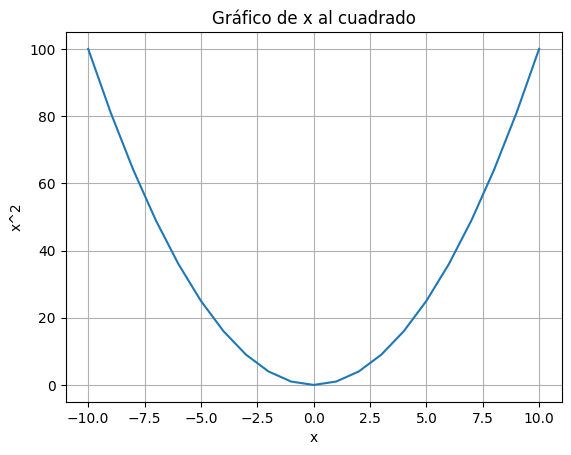

In [107]:
# Generar una lista de valores de x entre -10 y 10
x_range = list(range(-10, 11))

# Calcular los valores de x al cuadrado
x_squared = [x**2 for x in x_range]

# Crear la serie de pandas
serie_x_squared = pd.Series(x_squared, index=x_range)

# Mostrar la serie
print(serie_x_squared)
serie_x_squared.plot(kind='line', title='Gráfico de x al cuadrado')
plt.xlabel('x')
plt.ylabel('x^2')
plt.grid(True)
plt.show()

In [113]:
import numpy as np
import pandas as pd

# Listas de nombres y apellidos
nombres = ['Juan', 'Ana', 'Luis', 'María', 'Carlos', 'Lucía', 'Pedro', 'Sofía', 'Miguel', 'Laura']
apellidos = ['Pérez', 'García', 'Martínez', 'Rodríguez', 'López', 'González', 'Hernández', 'Fernández', 'Sánchez', 'Ramírez']

# Generar nombres y apellidos al azar
np.random.seed(0)
nombres_azar = np.random.choice(nombres, 10)
apellidos_azar = np.random.choice(apellidos, 10)

# Generar edades al azar entre 20 y 40
edades_azar = np.random.randint(20, 41, 10)

# Crear la serie de nombres completos
nombres_completos = [f"{nombre} {apellido}" for nombre, apellido in zip(nombres_azar, apellidos_azar)]

# Crear el DataFrame
df_nuevos = pd.DataFrame({
    'Nombre': nombres_completos,
    'Conocido': apellidos_azar,
    'Edad': edades_azar
})

# Mostrar el DataFrame
(df_nuevos)

# Agregar una nueva fila con datos
nuevo_dato = {'Nombre': 'Pedro Ramírez', 'Conocido': 'Ramírez', 'Edad': 30}

# Si nuevo_dato es un diccionario, conviértelo en un DataFrame
nuevo_dato_df = pd.DataFrame([nuevo_dato])

# Usar concat para agregar el nuevo dato
df_nuevos = pd.concat([df_nuevos, nuevo_dato_df], ignore_index=True)

# Mostrar el DataFrame actualizado
df_nuevos

# Contar los alimentos de cada columna
conteo_alimentos = df_nuevos['Nombre'].value_counts()
(conteo_alimentos)


Nombre
Lucía Fernández    2
María Sánchez      2
Juan Hernández     1
Sofía García       1
Laura Hernández    1
María Fernández    1
Luis Sánchez       1
Carlos García      1
Pedro Ramírez      1
Name: count, dtype: int64

In [117]:
# Crear el primer DataFrame
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Nombre': ['Juan', 'Ana', 'Luis', 'María']
})

# Crear el segundo DataFrame
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Apellido': ['Pérez', 'García', 'Martínez', 'Rodríguez']
})

# Unir los DataFrames usando la columna 'ID'
df_merged = pd.merge(df1, df2, on='ID', how='inner')

# Mostrar el DataFrame resultante
(df_merged)

# Unir los DataFrames usando la columna 'ID' con un join
df_joined = df1.set_index('ID').join(df2.set_index('ID'), how='inner')

# Mostrar el DataFrame resultante
df_joined

,Nombre,Apellido
ID,,
3,Luis,Pérez
4,María,García
